# Summary Statistics and Comparisons by Snow Year

Table of Stats per year (all data)
- number of pits
- number of layers
- Unique countries
- Unique users
- Professional pits
- non-professional pits
- ECT Results qty
- CT Results qty
- PST Results qty

Charts of overall data
- pits by country
- qty of pits by year
- Global map?
- Heatmap of pit location in US

US Pits by Season
- 

Montana Pits by Season
- Year over year pit qty by date

For each season
- P

#### Import Libraries

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from snowpylot.caaml_parser import caaml_parser

#### Define Folders

In [2]:
# Define folders and create a list of all CAAML files

# 2019-2020 
folder_path = "snowpits/by_season/2019-2020"  

caaml_files_19_20 = [
    f for f in os.listdir(folder_path) if f.endswith(".xml")
]  # List of all CAAML files in the folder

# 2020-2021 
folder_path = "snowpits/by_season/2019-2020"  

caaml_files_20_21 = [
    f for f in os.listdir(folder_path) if f.endswith(".xml")
]  # List of all CAAML files in the folder

# 2021-2022 
folder_path = "snowpits/by_season/2019-2020"  

caaml_files_21_22 = [
    f for f in os.listdir(folder_path) if f.endswith(".xml")
]  # List of all CAAML files in the folder

# 2022-2023 
folder_path = "snowpits/by_season/2019-2020"  

caaml_files_22_23 = [
    f for f in os.listdir(folder_path) if f.endswith(".xml")
]  # List of all CAAML files in the folder

## 2019-2020
10/1/2019-9/30-2020

#### Parse files and build dataframe

In [3]:
#Parse 2019-2020 CAAML files

pitList = []

for file in caaml_files_19_20: # iterate through each file in the folder
    file_path = folder_path + "/" + file # create the file path
    pit = caaml_parser(file_path) # parse the file

    numPrimaryGrainForm = 0 # initialize
    numPrimaryGrainSize = 0 # initialize
    for layer in pit.snowProfile.layers: # iterate through each layer in the pit
        if layer.grainFormPrimary is not None: # if the layer has a primary grain form
            numPrimaryGrainForm += 1 # increment the number of primary grain forms
            if layer.grainFormPrimary.grainSizeAvg is not None: # if the layer has a primary grain size
                numPrimaryGrainSize += 1 # increment the number of primary grain sizes

    pitDict = { # create a dictionary of the pit information for each pit
        "PitID": pit.coreInfo.pitID,
        "Country": pit.coreInfo.location.country,
        "Operation Name": pit.coreInfo.user.operationName,
        "SnowPilot Username": pit.coreInfo.user.username,
        "num Layers": len(pit.snowProfile.layers),
        "num Layers wPrimary Grain Form": numPrimaryGrainForm,
        "num Layers wPrimary Grain Size": numPrimaryGrainSize,
        "tempMeasurements": len(pit.snowProfile.tempProfile)
        if pit.snowProfile.tempProfile != None
        else 0,
        "densityMeasurements": len(pit.snowProfile.densityProfile)
        if pit.snowProfile.densityProfile != None
        else 0,
        "ECT_qty": len(pit.stabilityTests.ECT),
        "CT_qty": len(pit.stabilityTests.CT),
        "PST_qty": len(pit.stabilityTests.PST),
        "RBT_qty": len(pit.stabilityTests.RBlock)
    }
    pitList.append(pitDict) # append the pit dictionary to the list

df = pd.DataFrame(pitList)


In [4]:
# Create a dictionary to summarize available info

summary_info = {
    "Pits": int(df["PitID"].count()), # number of pits  
    "Layers": int(df["num Layers"].sum()), # number of layers
    "Layers wPrimary Grain Form": int(df["num Layers wPrimary Grain Form"].sum()), # number of layers with primary grain form
    "Layers wPrimary Grain Size": int(df["num Layers wPrimary Grain Size"].sum()), # number of layers with primary grain size
    "Pits with Density Info": int((df["densityMeasurements"] != 0).sum()), # number of pits with density info
    "Density Measurements": int(df["densityMeasurements"].sum()), # number of density measurements
    "Pits with Temp Info": int((df["tempMeasurements"] != 0).sum()), # number of pits with temp info
    "Temp Measurements": int(df["tempMeasurements"].sum()), # number of temp measurements
    "ECT Results": int(df["ECT_qty"].sum()), # number of ECT results
    "CT Results": int(df["CT_qty"].sum()), # number of CT results
    "PST Results": int(df["PST_qty"].sum()), # number of PST results
    "RBT Results": int(df["RBT_qty"].sum()), # number of RBT results
}


#### Display Summary Info

In [5]:
for key, value in summary_info.items():
    print(key + ": " + str(value))

Pits: 4663
Layers: 36282
Layers wPrimary Grain Form: 29369
Layers wPrimary Grain Size: 17443
Pits with Density Info: 151
Density Measurements: 1392
Pits with Temp Info: 2356
Temp Measurements: 21644
ECT Results: 4507
CT Results: 5236
PST Results: 582
RBT Results: 33


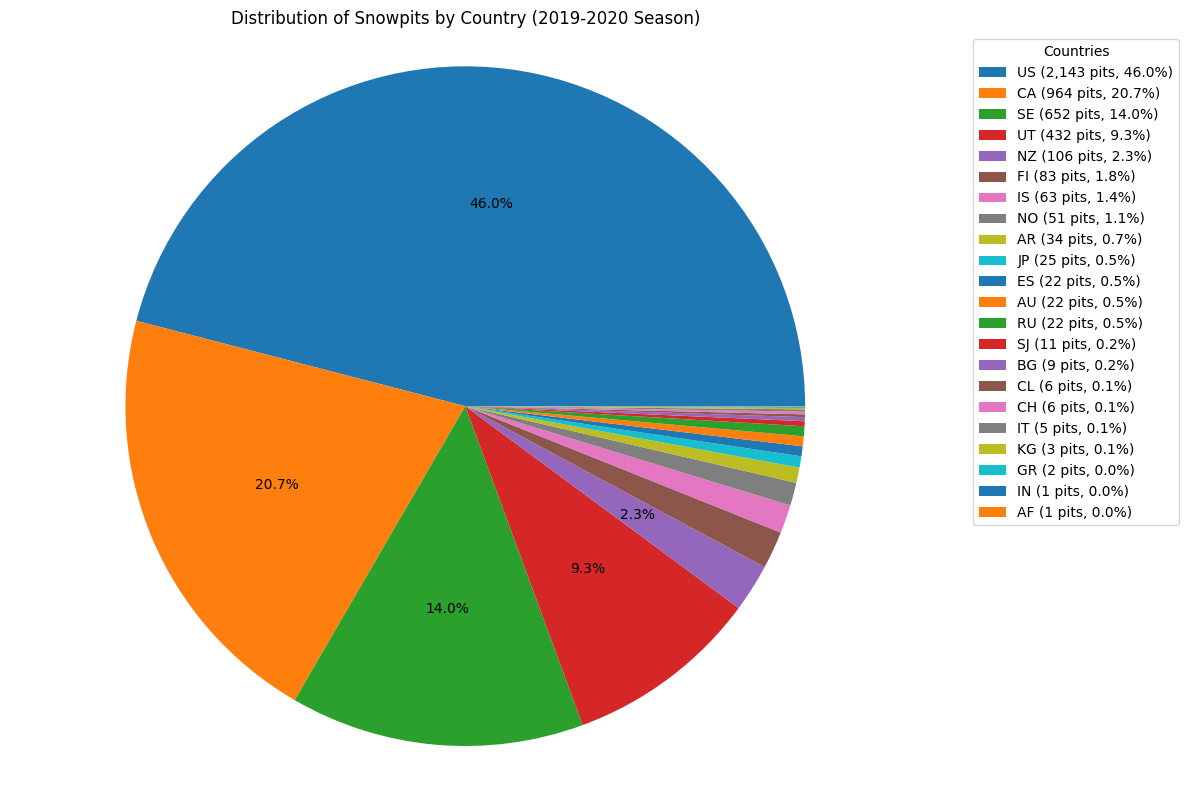

In [9]:
# Create pie chart of pits by country with detailed legend
plt.figure(figsize=(12, 8))
country_counts = df['Country'].value_counts()
total_pits = country_counts.sum()
percentages = (country_counts / total_pits * 100).round(1)

# Create legend labels with both count and percentage
legend_labels = [f'{country} ({count:,} pits, {pct}%)' 
                for country, count, pct in zip(country_counts.index, country_counts.values, percentages)]

# Custom function to only show labels for slices >= 2%
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(pct*total/100.0)
        return f'{pct:.1f}%' if pct >= 2 else ''
    return my_autopct

plt.pie(country_counts.values, labels=None, autopct=make_autopct(country_counts.values))
plt.title('Distribution of Snowpits by Country (2019-2020 Season)')
plt.legend(legend_labels, title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent legend cutoff
plt.show()

## 2020-2021
10/1/2020-9/30-2021